In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('/content/weight-height.csv')

In [ ]:
df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [ ]:
df['Height'].describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

In [ ]:
import seaborn as sns

<Axes: xlabel='Height', ylabel='Density'>

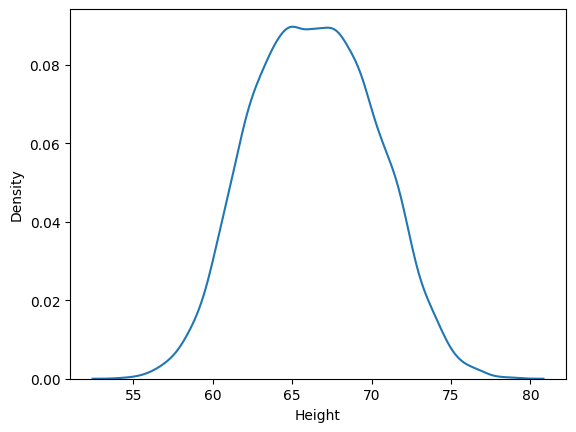

In [ ]:
sns.kdeplot(df,x='Height')

<Axes: xlabel='Height', ylabel='Density'>

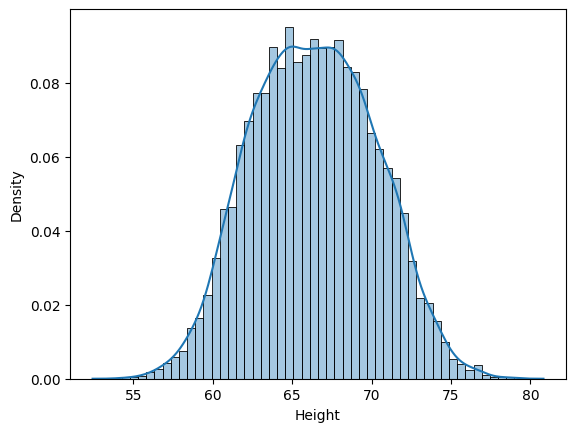

In [ ]:
sns.histplot(data=df, x="Height", stat="density", alpha=0.4, kde=True, kde_kws={"cut": 3})

<Axes: xlabel='Height'>

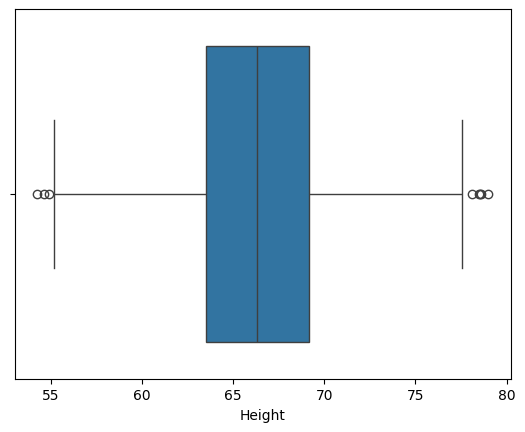

In [ ]:
sns.boxplot(data=df,x='Height')

In [ ]:
upper_limit = df['Height'].quantile(0.99) #99%ile
upper_limit

74.7857900583366

In [ ]:
lower_limit = df['Height'].quantile(0.01) #1%ile
lower_limit

58.13441158671655

##*note* - upper bound and lower bound should be symmetric

95 5

99 1

90 10

In [ ]:
#outliers

df[(df['Height'] > upper_limit) | (df['Height'] < lower_limit)]

,Gender,Height,Weight
23,Male,75.205974,228.761781
190,Male,76.709835,235.035419
197,Male,75.944460,231.924749
202,Male,75.140821,224.124271
215,Male,74.795375,232.635403
...,...,...,...
9761,Female,56.975279,90.341784
9825,Female,55.979198,85.417534
9895,Female,57.740192,93.652957
9904,Female,57.028857,101.202551


##Trimming

In [ ]:
new_df = df[(df['Height'] <= upper_limit) & (df['Height'] >= lower_limit)]
new_df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [ ]:
df['Height'].describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

In [ ]:
new_df['Height'].describe()

count    9800.000000
mean       66.364366
std         3.645075
min        58.134496
25%        63.577162
50%        66.318070
75%        69.119896
max        74.785714
Name: Height, dtype: float64

<Axes: xlabel='Height'>

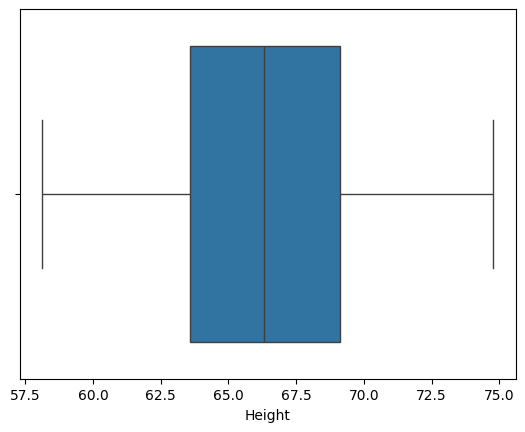

In [ ]:
sns.boxplot(new_df,x='Height')

<Axes: xlabel='Height', ylabel='Density'>

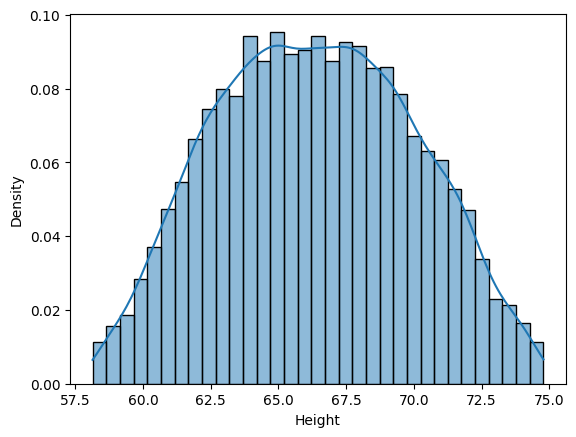

In [24]:
sns.histplot(data=new_df,x='Height',kde=True,stat='density')

##**the higher the %ile(say 99), the less data you are removing**

#Winsorization

In [25]:
df_copy = df.copy()

In [26]:
df_copy['Height'] = np.where(df_copy['Height'] >= upper_limit,upper_limit,
        np.where(df_copy['Height'] <= lower_limit,lower_limit,df_copy['Height'])
         )

<Axes: xlabel='Height'>

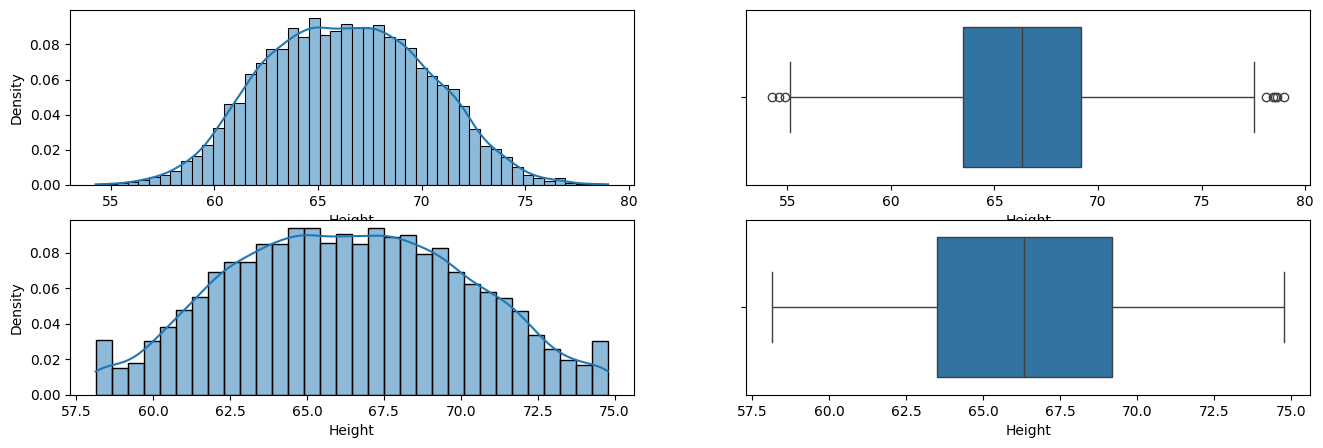

In [28]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(16,5))
#before
fig.add_subplot(2,2,1)
sns.histplot(df,x='Height',kde=True,stat='density')
fig.add_subplot(2,2,2)
sns.boxplot(df,x='Height')

#after
fig.add_subplot(2,2,3)
sns.histplot(df_copy,x='Height',kde=True,stat='density')
#values are end increased(local maxima) because somewhat 200 outliers values were capped at the upper bound and lower bound
fig.add_subplot(2,2,4)
sns.boxplot(df_copy,x='Height') #no outliers now


In [30]:
df_copy.shape

(10000, 3)

In [29]:
df_copy['Height'].describe()

count    10000.000000
mean        66.366281
std          3.795717
min         58.134412
25%         63.505620
50%         66.318070
75%         69.174262
max         74.785790
Name: Height, dtype: float64

In [31]:
df['Height'].describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64